In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像読み込み

In [114]:
# キーポイントなどを見やすくするためにグレースケールで画像読み込み
img1 = cv2.imread('IMG_0191.JPG', 0)
img2 = cv2.imread('IMG_0192.JPG', 0)
height, width = img1.shape

# 縮小 解像度が大きいため
img1 = cv2.resize(img1, (int(width*0.25), int(height*0.25)))
img2 = cv2.resize(img2, (int(width*0.25), int(height*0.25)))
height, width = img1.shape

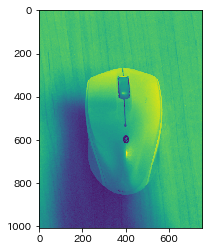

In [115]:
plt.imshow(img1)

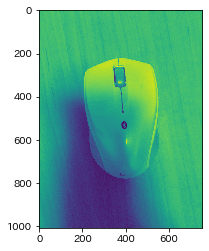

In [116]:
plt.imshow(img2)

In [117]:
#回転の中心
center = (int(width/2), int(height/2))
#スケールを指定
scale = 1.0

In [118]:
#回転角
angle = [-1, 0, 1]
# x
x_slide = [-1, 0, 1]
# y
y_slide = [-1, 0, 1]

In [119]:
trans = []
# angle
for a in angle:
    for x in x_slide:
        for y in y_slide:
            rotate = cv2.getRotationMatrix2D(center, a, scale)
            rotate_slide = rotate + np.array([[0,0,x],[0,0,y]])
            trans.append(rotate_slide)

In [127]:
edge = 200
bestimg2 = img2.copy()
minssd = 1001001001

In [128]:
while(True):
    bestM = None

    for M in trans:
        img2_trans = cv2.warpAffine(bestimg2, M, (width,height))
        ssd = cv2.matchTemplate(img1[edge:-edge], img2_trans[edge:-edge], cv2.TM_SQDIFF)[0,0]
        if minssd > ssd:
            minssd = ssd
            bestM = M

    if bestM is None:
        break
    else:
        bestimg2 = cv2.warpAffine(bestimg2, bestM, (width,height))
        #print(bestM)

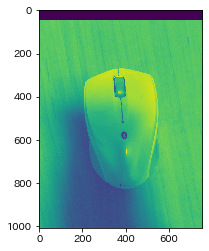

In [129]:
plt.imshow(bestimg2)

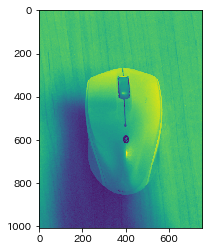

In [126]:
plt.imshow(img1)

## 関数

In [131]:
def image_slide(img1, img2):
    
    height, width = img1.shape
    
    ###候補
    #回転角
    angle = [-1, 0, 1]
    # x
    x_slide = [-1, 0, 1]
    # y
    y_slide = [-1, 0, 1]
    
    #回転の中心
    center = (int(width/2), int(height/2))
    #スケールを指定
    scale = 1.0
    
    #アフィン行列27パターン
    trans = []
    # angle
    for a in angle:
        for x in x_slide:
            for y in y_slide:
                rotate = cv2.getRotationMatrix2D(center, a, scale)
                rotate_slide = rotate + np.array([[0,0,x],[0,0,y]])
                trans.append(rotate_slide)
    
    #
    edge = 200 #端ピクセルはSSD計算時に除く
    bestimg2 = img2.copy()
    minssd = 1001001001
    
    #ssdが最小になるまでループ
    while(True):
        bestM = None

        for M in trans:
            img2_trans = cv2.warpAffine(bestimg2, M, (width,height))
            ssd = cv2.matchTemplate(img1[edge:-edge], img2_trans[edge:-edge], cv2.TM_SQDIFF)[0,0]
            if minssd > ssd:
                minssd = ssd
                bestM = M

        if bestM is None:
            break
        else:
            bestimg2 = cv2.warpAffine(bestimg2, bestM, (width,height))
            #print(bestM)

    return bestimg2